# Ensemble Methods

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

In [2]:
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.1.4
qtconsole        : 4.7.7
ipython          : 7.19.0
ipykernel        : 5.3.4
jupyter client   : 6.1.7
jupyter lab      : 2.2.6
nbconvert        : 6.0.7
ipywidgets       : 7.5.1
nbformat         : 5.0.8
traitlets        : 5.0.5


In [3]:
!python --version

Python 3.8.5


In [4]:
# Importing Data

In [5]:
data = pd.read_csv('data/aviation_data.csv', index_col='id')
data = data.drop(data.columns[0], axis=1) # dropping an index column

In [6]:
print('This dataset contains {} observations and {} attributes'.format(*data.shape))

This dataset contains 129880 observations and 23 attributes


In [7]:
# 80/20 split
X_train = np.load('data/X_train_s.npy')   # X values have been standardized
X_test = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

In [8]:
X_train.shape

(103589, 27)

In [9]:
X_test.shape

(25898, 27)

# Boosting - XG Boost, Adaboost,CatBoost

### Hyperparameter Tuning

#### Initializing Grid Search

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [11]:
def modelOptimization(clf,grid,x,y):
        #Input is the classifier,grid,x,and y.
        #performs Random Grid Search Using 5-fold Cross Validation
        #outputs the best model and accuracy
        clfmodel = RandomizedSearchCV(estimator = clf,n_iter=200,param_distributions = grid,scoring='accuracy', cv=3,verbose =1, random_state=2021,n_jobs=-1)
        clfmodel.fit(x,y)
        print('Model Best Score: \n',clfmodel.best_score_)
        print('Model Best Parameters: \n',clfmodel.best_params_)

### XG Boost

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [15]:
# XG Boost gridsearch

# Training


gb = xgb.XGBClassifier()

# Grid
gbgrid = {'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 101, num = 25)],    # optimizing number of trees and tree depth
               'max_depth': [9,10,11,12,None],
              'subsample':[i/10 for i in range (7,11)],
               'colsample_bytree': [i/10 for i in range (7,11)],
                 'alpha:': [0.5,1,5]}
modelOptimization(gb,gbgrid,X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  7.8min finished
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { alpha: } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Best Score: 
 0.9632682859571732
Model Best Parameters: 
 {'subsample': 1.0, 'n_estimators': 73, 'max_depth': None, 'colsample_bytree': 1.0, 'alpha:': 1}


### AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
# AdaBoost random gridsearch

ada = AdaBoostClassifier()
# Grid
adagrid = {   # optimizing number of trees and tree depth
               'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 101, num = 25)],
                'learning_rate':[0.001,0.1,0.5,1,2,3],
                'algorithm':['SAMME','SAMME.R']}
modelOptimization(ada,adagrid,X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  9.3min finished


Model Best Score: 
 0.9289596399562967
Model Best Parameters: 
 {'n_estimators': 97, 'learning_rate': 1, 'algorithm': 'SAMME.R'}


### CatBoost

In [14]:
import catboost as cb

In [21]:
#catboost random gridsearch

CATBoost = cb. CatBoostClassifier()
# Grid
catgrid =    {'learning_rate': [0.01,0.02,0.03,0.04],
        'depth': [4, 6,7,8,9,10,15,20],
        'l2_leaf_reg': [0,0.5,1, 3],
        'iterations': [10, 20,30,40,50,60,70,80,90, 100,150]}

modelOptimization(CATBoost,catgrid,X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 60.0min finished


0:	learn: 0.6169770	total: 60.1ms	remaining: 8.96s
1:	learn: 0.5333182	total: 122ms	remaining: 9.03s
2:	learn: 0.4662597	total: 186ms	remaining: 9.14s
3:	learn: 0.4243581	total: 250ms	remaining: 9.13s
4:	learn: 0.3885085	total: 311ms	remaining: 9.02s
5:	learn: 0.3459653	total: 370ms	remaining: 8.88s
6:	learn: 0.3127338	total: 433ms	remaining: 8.84s
7:	learn: 0.2860257	total: 493ms	remaining: 8.74s
8:	learn: 0.2629254	total: 550ms	remaining: 8.62s
9:	learn: 0.2476565	total: 611ms	remaining: 8.55s
10:	learn: 0.2288488	total: 672ms	remaining: 8.49s
11:	learn: 0.2152729	total: 731ms	remaining: 8.41s
12:	learn: 0.2061652	total: 795ms	remaining: 8.38s
13:	learn: 0.1986240	total: 860ms	remaining: 8.35s
14:	learn: 0.1872202	total: 919ms	remaining: 8.27s
15:	learn: 0.1800384	total: 983ms	remaining: 8.23s
16:	learn: 0.1743572	total: 1.04s	remaining: 8.16s
17:	learn: 0.1697610	total: 1.1s	remaining: 8.09s
18:	learn: 0.1653433	total: 1.17s	remaining: 8.06s
19:	learn: 0.1604583	total: 1.23s	remaini

In [15]:
>>> from sklearn import datasets, linear_model,metrics
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import make_scorer
>>> from sklearn.metrics import confusion_matrix, accuracy_score,precision_recall_curve
import seaborn as sns


In [16]:
def fit_predict_score(clf):
    """Predicts the average accuracy score of a classifier clf and outputs a confusion matrix."""
    clf.fit(X_train, np.ravel(y_train)) # fitting the model to the training data
    predicted = clf.predict(X_test) #getting predicted values
    
    #cross tabulation of predicted and actual values produces the correlation matrix
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),4)
    plt.title(clf , fontsize = 12)
    plt.suptitle("Confusion Matrix")
    plt.show()
    print("Accuracy Score: ",accuracy)
    print (metrics.classification_report(y_test,predicted))

In [17]:
def roccurve(clf):
# crea`ting roc curve
    predicted = clf.predict(X_test) #getting y hat
    fpr,tpr,_ = metrics.roc_curve(y_test,predicted)  #comparing y hat and the actuall y 
    #plotting
    plt.title('ROC Curve')
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [18]:
def prcurve(clf):
    predicted = clf.predict(X_test)
    precision,recall,_ = precision_recall_curve(y_test,predicted)
    #plotting
    plt.plot(recall,precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision Recall Curve")
    plt.show()

In [19]:
def metrics_report(model):
        fit_predict_score(model)
        roccurve(model)
        prcurve(model)

In [20]:
bestCat =  cb.CatBoostClassifier(learning_rate= 0.04, l2_leaf_reg= 1, iterations= 150, depth= 10)
bestAda = AdaBoostClassifier(n_estimators= 97, learning_rate= 1, algorithm= 'SAMME.R')
bestXGB = xgb.XGBClassifier(subsample= 1.0, n_estimators= 73,max_depth= None, colsample_bytree= 1.0, alpha= 1,eval_metric='logloss')
bestXGB1 = xgb.XGBClassifier(min_samples_split=45, 
                                 min_samples_leaf=9, 
                                 max_leaf_nodes=190, 
                                 max_depth=20, 
                                 criterion='entropy', 
                                 class_weight=None,eval_matric='logloss')

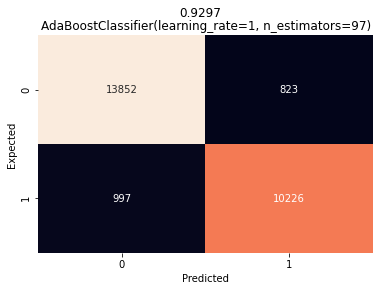

0.9297
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14675
           1       0.93      0.91      0.92     11223

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



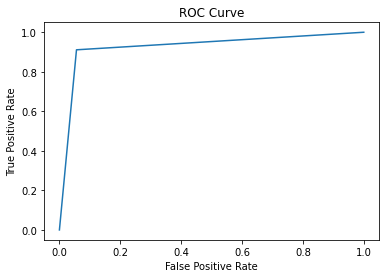

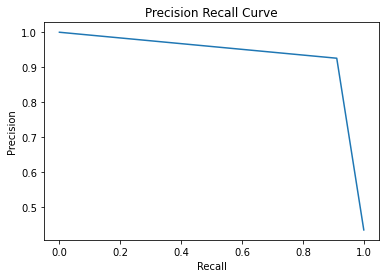

In [73]:
metrics_report(bestAda)

C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


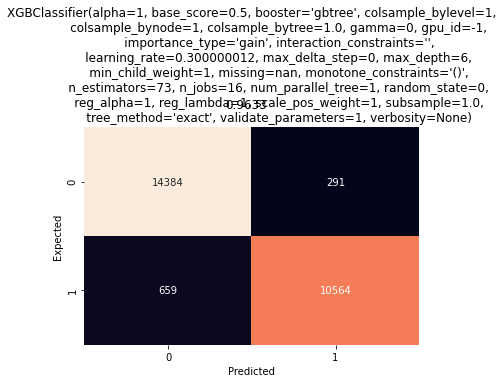

0.9633
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.97      0.94      0.96     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



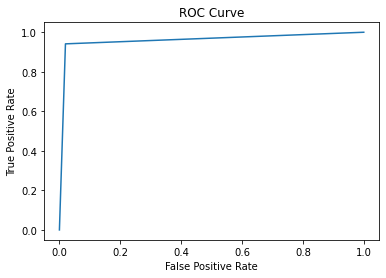

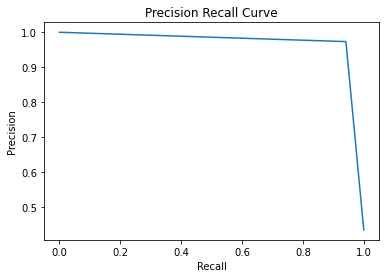

In [74]:
metrics_report(bestXGB)

0:	learn: 0.6169770	total: 57.8ms	remaining: 8.61s
1:	learn: 0.5333182	total: 113ms	remaining: 8.36s
2:	learn: 0.4662597	total: 168ms	remaining: 8.24s
3:	learn: 0.4243581	total: 234ms	remaining: 8.52s
4:	learn: 0.3885085	total: 297ms	remaining: 8.61s
5:	learn: 0.3459653	total: 360ms	remaining: 8.64s
6:	learn: 0.3127338	total: 422ms	remaining: 8.63s
7:	learn: 0.2860257	total: 484ms	remaining: 8.59s
8:	learn: 0.2629254	total: 542ms	remaining: 8.5s
9:	learn: 0.2476565	total: 600ms	remaining: 8.39s
10:	learn: 0.2288488	total: 657ms	remaining: 8.3s
11:	learn: 0.2152729	total: 716ms	remaining: 8.23s
12:	learn: 0.2061652	total: 775ms	remaining: 8.17s
13:	learn: 0.1986240	total: 834ms	remaining: 8.1s
14:	learn: 0.1872202	total: 895ms	remaining: 8.05s
15:	learn: 0.1800384	total: 959ms	remaining: 8.03s
16:	learn: 0.1743572	total: 1.02s	remaining: 7.99s
17:	learn: 0.1697610	total: 1.08s	remaining: 7.92s
18:	learn: 0.1653433	total: 1.14s	remaining: 7.86s
19:	learn: 0.1604583	total: 1.2s	remaining:

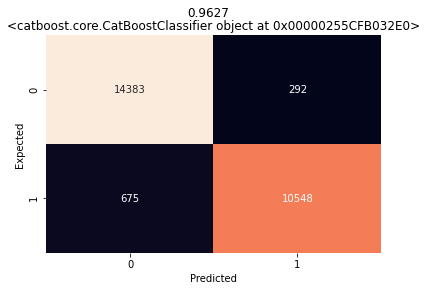

0.9627
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14675
           1       0.97      0.94      0.96     11223

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



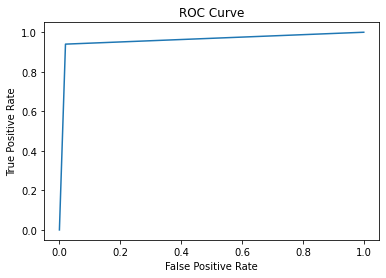

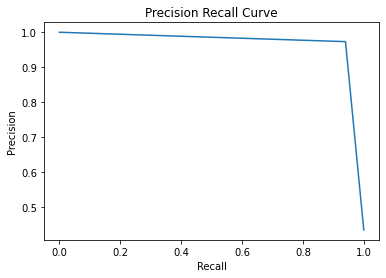

In [75]:
metrics_report(bestCat)

# Stacking 

In [21]:
# Stacking our best performing models
# Best Decision Tree Model  
from sklearn import tree
from sklearn.linear_model import LogisticRegression
bestDT = tree.DecisionTreeClassifier(min_samples_split=45, 
                                 min_samples_leaf=9, 
                                 max_leaf_nodes=190, 
                                 max_depth=20, 
                                 criterion='entropy', 
                                 class_weight=None)
# best random forest 
from sklearn.ensemble import RandomForestClassifier
bestRF =rf = RandomForestClassifier( min_samples_split=13, 
                             min_samples_leaf=4, 
                             max_depth=25, 
                             criterion='entropy', 
                             class_weight=None,
                             n_estimators=50,
                             n_jobs=-1)

# best support vector classifier
from sklearn.svm import SVC
bestSVC=SVC(kernel='rbf')

#best logistic Regression
bestLogReg = LogisticRegression(
    C=100,
    tol=.01,
    class_weight=None,
    fit_intercept=False,
    l1_ratio=1.0,
    max_iter=1000,
    penalty='elasticnet',
    solver='saga'
)

### Stacking all of our best models

In [23]:

from sklearn.ensemble import StackingClassifier
# Creating 2 layers of estimation, with 2 learners in each.
# best gradient boost and support vector classifier
layer_one_estimators = [
                        ('rf_1', bestSVC),
                        ('gb_1',bestXGB )            
                       ]
#best decision tree and random forest
layer_two_estimators = [
                        ('svc_1',bestDT),
                        ('rf_1',bestRF)
                        
                       ]
# The final meta-estimator is logistic regression
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# stacking the models.
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)


#displaying accuracy
print("Accuracy Score: \n",clf.fit(X_train, y_train).score(X_test, y_test))

C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to u

Accuracy Score: 
 0.962390918217623


### Stacking just SVC  and XG Boost

In [25]:
from sklearn.ensemble import StackingClassifier
# Creating 1 layers of estimation, with 2 learners.
# best gradient boost and Support vector machine classifier
layer_one_estimators = [
                        ('rf_1', bestSVC),
                        ('gb_1',bestXGB )            
                       ]

# The final meta-estimator is logistic regression

# stacking the models.
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=LogisticRegression())


#displaying accuracy
print("Accuracy Score: \n",clf.fit(X_train, y_train).score(X_test, y_test))

C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Edvinas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy Score: 
 0.9626225963394857


### the best stacked model does not outperform our optimized XG boost or random forest models, which both had an accuracy rating of 96.33%. The stacked model was more computationally expensive And yielded an accuracy rate of 96.26%.